<a href="https://colab.research.google.com/github/NikitaSUAI/EventDetection/blob/main/EventDetection_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первый запуск и загрузка датасетов

Ссылка на [kaggle competition](https://www.kaggle.com/competitions/itmo-acoustic-event-detection-2022/overview)

In [1]:
!wget https://www.openslr.org/resources/28/rirs_noises.zip

--2022-06-04 13:54:19--  https://www.openslr.org/resources/28/rirs_noises.zip
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://us.openslr.org/resources/28/rirs_noises.zip [following]
--2022-06-04 13:54:19--  http://us.openslr.org/resources/28/rirs_noises.zip
Resolving us.openslr.org (us.openslr.org)... 46.101.158.64
Connecting to us.openslr.org (us.openslr.org)|46.101.158.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1311166223 (1.2G) [application/zip]
Saving to: ‘rirs_noises.zip’

rirs_noises.zip       4%[                    ]  54.84M  21.5MB/s               ^C


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c itmo-acoustic-event-detection-2022

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp /content/rirs_noises.zip '/content/drive/My Drive/rirs_noises.zip'
! cp /content/itmo-acoustic-event-detection-2022.zip '/content/drive/My Drive/itmo-acoustic-event-detection-2022.zip'

# Следующие запуски и загрузка датасетов из google drive

## Загрузка чистых датасетов

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! rm -rf /content/RIRS_NOISES
! rm -rf /content/audio_test

In [3]:
! unzip '/content/drive/My Drive/rirs_noises.zip' -d /content/ > /dev/null
! unzip '/content/drive/My Drive/itmo-acoustic-event-detection-2022.zip' -d /content/ > /dev/null


## Загрузка аугментированного датасета TODO

# Необходимые библиотеки

In [4]:
from pathlib import Path

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import torch
import torchaudio
import torchaudio.sox_effects as sox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report

# Пути

In [5]:
TRAIN_LIST = Path("/content/train.csv")
TRAIN_DIR = Path("/content/audio_train/train")
TEST_DIR = Path("/content/audio_test/test")

REAL_RIR_PATH = Path("/content/RIRS_NOISES/real_rirs_isotropic_noises")
SIM_RIR_PATH = Path("/content/RIRS_NOISES/simulated_rirs")

NOISE = Path("/content/RIRS_NOISES/pointsource_noises")

# Смотрим что у нас в датасете

In [6]:
train_dataset = pd.read_csv(TRAIN_LIST)
label_transformer = OrdinalEncoder()
train_dataset["int_label"] = label_transformer.fit_transform(train_dataset.label.to_numpy()[:, np.newaxis])[:, 0].astype(int)
train_dataset.head()

,fname,label,int_label
0,8bcbcc394ba64fe85ed4.wav,Finger_snapping,16
1,00d77b917e241afa06f1.wav,Squeak,34
2,17bb93b73b8e79234cb3.wav,Electric_piano,14
3,7d5c7a40a936136da55e.wav,Harmonica,22
4,17e0ee7565a33d6c2326.wav,Snare_drum,33


In [7]:
X_train, X_val, y_train, y_val = train_test_split(train_dataset.fname.to_numpy(), train_dataset.int_label.to_numpy(), test_size=0.2, random_state=27)

## Смотрим на сбалансированность датасета и наблюдаем его отсутствие

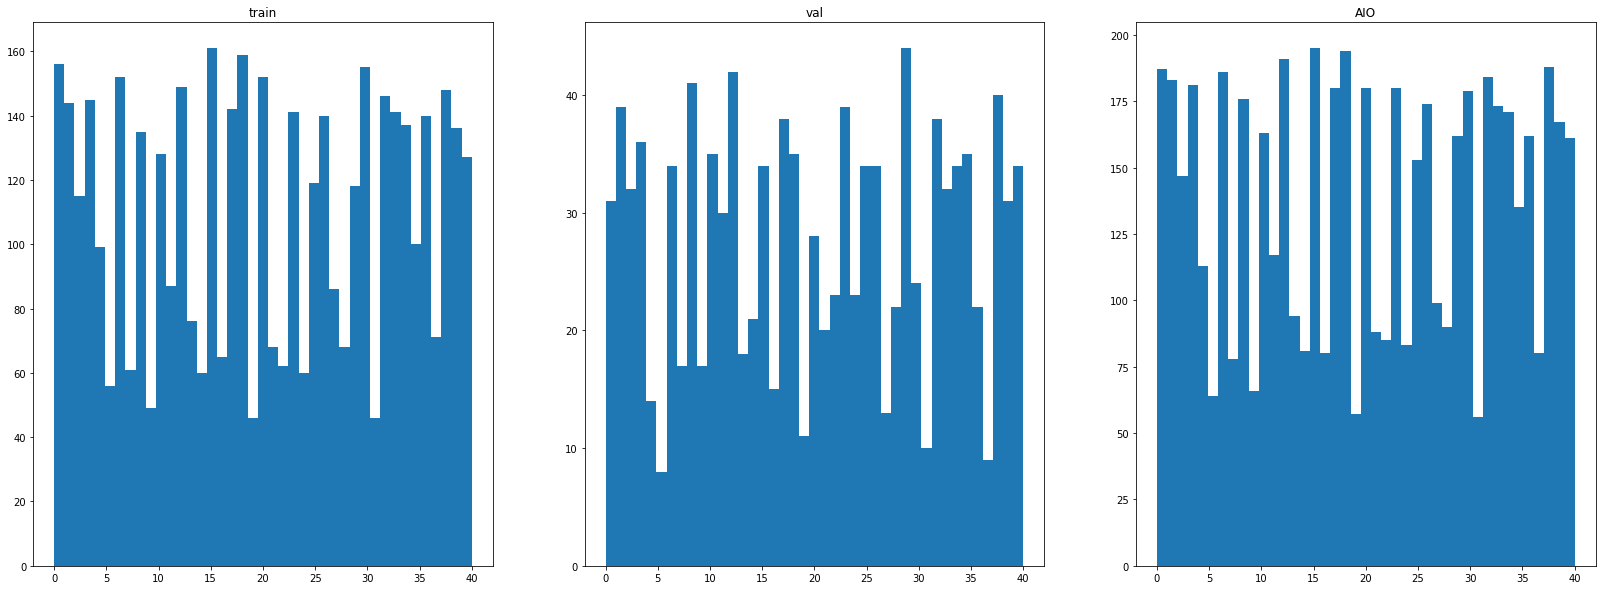

In [8]:
fig, ax  = plt.subplots(figsize=(28, 10), ncols=3)

ax[0].hist(y_train, train_dataset.int_label.unique().shape[0])
ax[0].set_title("train")

ax[1].hist(y_val, train_dataset.int_label.unique().shape[0])
ax[1].set_title("val")

ax[2].hist(train_dataset.int_label, train_dataset.int_label.unique().shape[0]);
ax[2].set_title("AIO");

## Константы
